Input library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
%matplotlib inline

Load Fashion Mnist dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

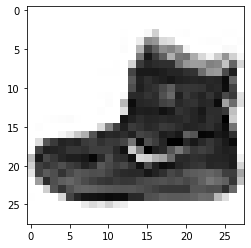

In [ ]:
plt.imshow(x_train[0],cmap='Greys')


Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [ ]:
class_labels=['T-shirt/top','Trouser','Pullover',	'Dress','Coat','Sandal','Shirt','Sneaker','Bag',	'Ankleboot']

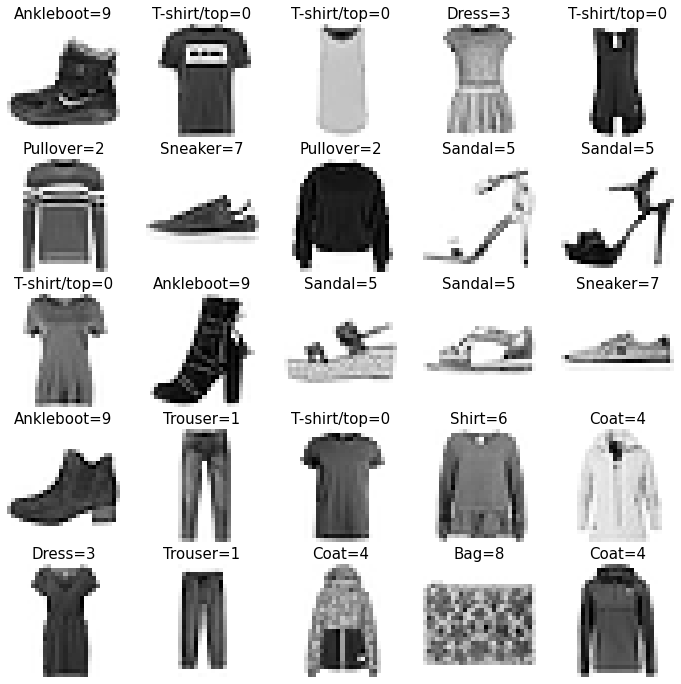

In [ ]:
plt.figure(figsize= (12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap= 'Greys')
  plt.axis(False)
  plt.title(class_labels[y_train[i]]+'='+str(y_train[i]), fontsize= 15)


# Feature Scaling

In [ ]:
x_train= x_train/255
x_test= x_test/255

# Creating CNN

In [ ]:
dmodel = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[28,28]),
            keras.layers.Dense(units=32, activation='relu'),
            keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
dmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dmodel.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
dmodel.fit(x_train,y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5446 - accuracy: 0.8110
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4082 - accuracy: 0.8565
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3766 - accuracy: 0.8658
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3515 - accuracy: 0.8740
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3398 - accuracy: 0.8772


In [ ]:
dmodel.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8614


[0.39470940828323364, 0.8614000082015991]

In [ ]:
y_pred=  dmodel.predict(x_test)

In [ ]:
np.argmax(y_pred[0])

9

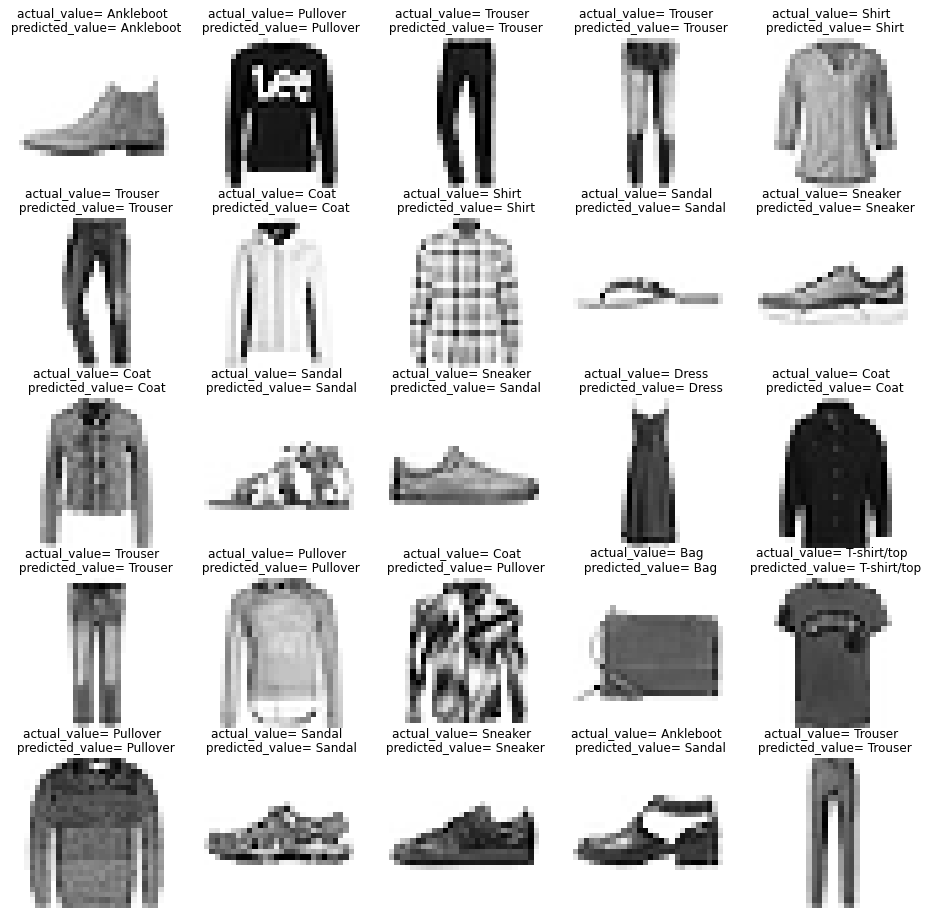

In [ ]:
plt.figure(figsize= (16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i], cmap= 'Greys')
  plt.axis('off')
  plt.title('actual_value= {} \n predicted_value= {}'.format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

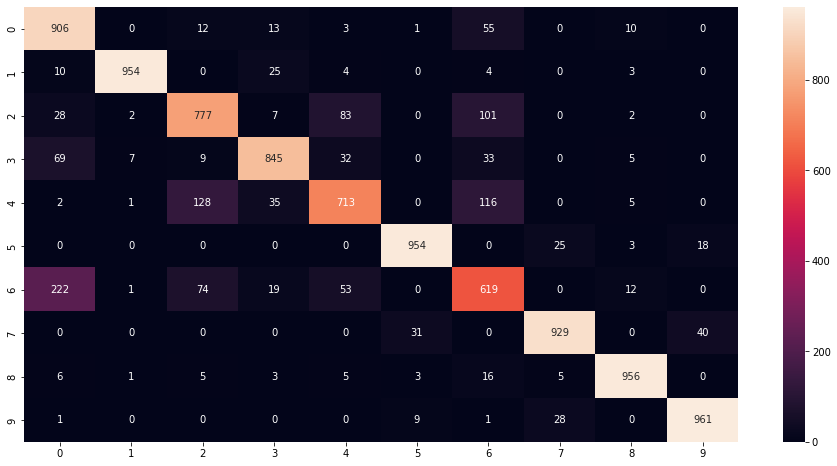

In [ ]:
plt.figure(figsize= (16,8))
sns.heatmap(cm, annot= True, fmt= 'd')

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,  [np.argmax(i) for i in y_pred], target_names= class_labels,)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.73      0.91      0.81      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.77      0.78      0.78      1000
       Dress       0.89      0.84      0.87      1000
        Coat       0.80      0.71      0.75      1000
      Sandal       0.96      0.95      0.95      1000
       Shirt       0.66      0.62      0.64      1000
     Sneaker       0.94      0.93      0.94      1000
         Bag       0.96      0.96      0.96      1000
   Ankleboot       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
dmodel.save('Fashion_mnist.py')

INFO:tensorflow:Assets written to: Fashion_mnist.py/assets
